Objetivo: El dataset Iris Species. El cual consiste en 50 muestras de flores de tres especies distintas (Iris-setosa, Iris-versicolor y Iris-virginica) con diferentes características (Largo del sépalo, ancho del sépalo, largo del pétalo y ancho del pétalo).

1 - Construir mediante un perceptrón, un modelo para separar dos clases de plantas que sean linealmente separables.

2 - Construir una red de feed-forward que pueda clasificar a las 3 plantas.

In [1]:
# Importa las librerias necesarias
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Carga la ruta al archivo de datos
ruta = os.path.dirname((os.path.abspath('data_features')))
ruta_datos = os.path.join(ruta, "iris.csv")

# Lectura del archivo a DataFrame
flores = pd.read_csv(ruta_datos)

In [3]:
# Busqueda de registros repetidos
def duplicados(df):
  """
  Verifica si el DataFrame ingresado tiene
  registros duplicados.

  :param:
  :df: DataFrame con los atributos.
  """
  hay_duplicados = df.duplicated().any()

  if hay_duplicados:
      print("El DataFrame tiene registros duplicados.")
  else:
      print("El DataFrame no tiene registros duplicados.")


In [4]:
duplicados(flores)

El DataFrame tiene registros duplicados.


In [5]:
# Elimina registros duplicados
flores = flores.drop_duplicates()

In [6]:
# Buscamos infirmacion del dataset
flores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          146 non-null    float64
 1   3.5          146 non-null    float64
 2   1.4          146 non-null    float64
 3   0.2          146 non-null    float64
 4   Iris-setosa  146 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


In [7]:
# Verifica si existe '-' como registro en el DataFrame
contiene_guion = flores.applymap(lambda x: '-' in str(x)).any().any()
print(f"¿Hay un '-' en el DataFrame?: {contiene_guion}")

¿Hay un '-' en el DataFrame?: True


C:\Users\fabri\AppData\Local\Temp\ipykernel_7200\1672031449.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  contiene_guion = flores.applymap(lambda x: '-' in str(x)).any().any()


In [8]:
# Agrega nombres a las columnas
nombres_columnas = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

In [9]:
# Asigna los nuevos nombres a las columnas del DataFrame
flores.columns = nombres_columnas

In [11]:
# Muestra los primeros registros
flores.head()

,sepal length,sepal width,petal length,petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [12]:
# Busca una descripcion de los datos
flores.describe()

,sepal length,sepal width,petal length,petal width
count,146.000000,146.000000,146.000000,146.000000
mean,5.861644,3.052740,3.796575,1.215753
std,0.829562,0.436948,1.753987,0.755822
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Vemos que tiene 146 registros (solo 1 duplicado) y 5 campos, de los cuales 4 son características reales y un objetivo categórico.

Las características y objetivo del problema son (Fisher, 1988):

| Característica | Objetivo |Medición                                        |
|----------------|----------|------------------------------------------------|
| sepal length   |          | cm                                             |
| sepal width    |          | cm                                             | 
| petal length   |          | cm                                             |
| petal width    |          | cm                                             |
|                | class    | clase de iris: Setosa, Versicolour o Virginica |

c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\fabri\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\fabri\App

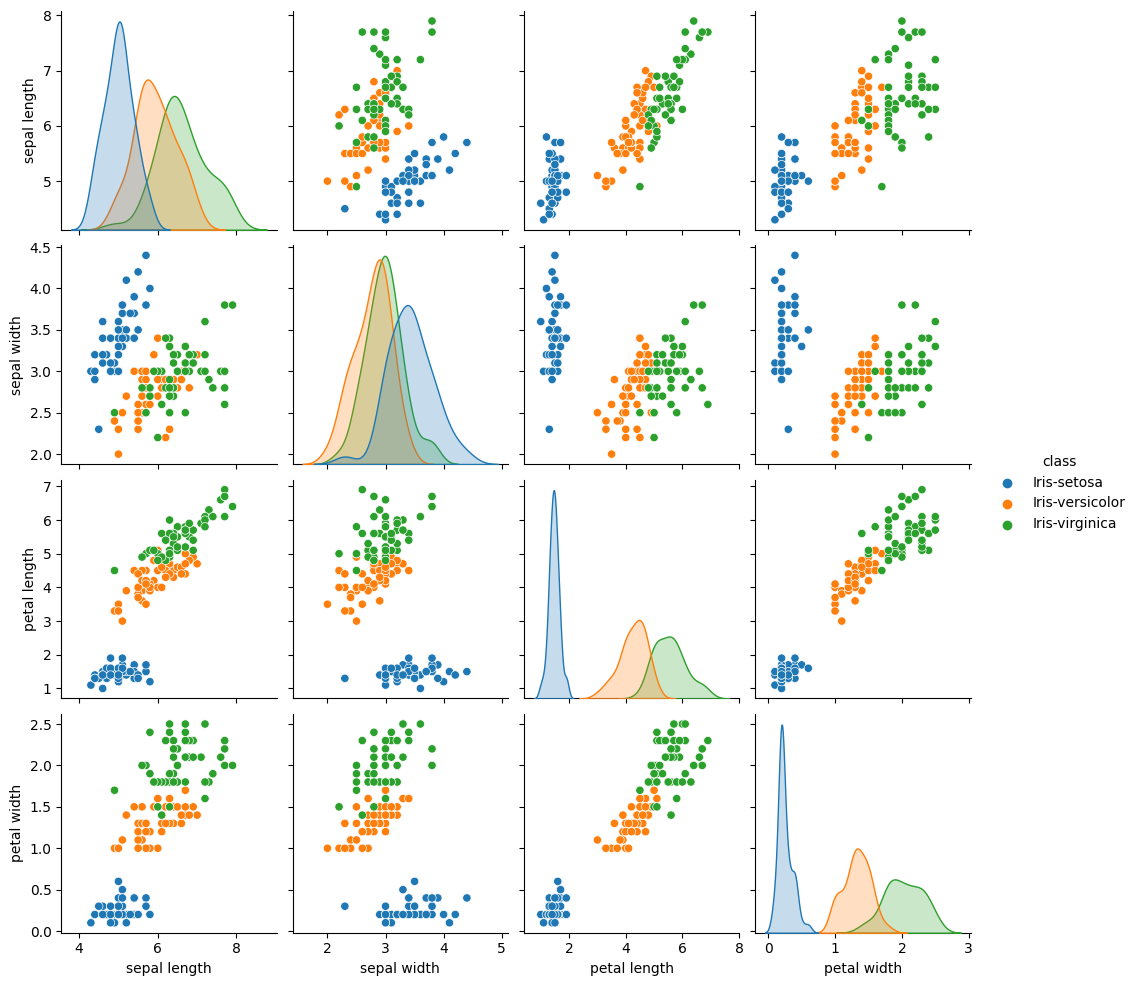

In [13]:
# Crear pairplot
sns.pairplot(flores, hue='class')
plt.show()

Observaciones: La especie setosa es más fácil de separar de las otras dos (versicolor y virginica), mientras que versicolor y virginica pueden tener áreas de superposición en ciertas características. No obstante, todos los pares de características parecen resultar útiles para su uso en modelos predictivos.

In [18]:
def outliers(df, multiplo):
  """
  Nos permite definir umbrales de outliers,
  y detectar estos últimos.

  :param:
  :df: DataFrame con los atributos.
  :multiplo: Cantidad de desvíos estándar para definir
            umbral de 'outliers'.
  """
  # Se recorre cada característica
  features = df.select_dtypes(include=[np.number]).columns
  for feature in features:
    mean = df[feature].mean()
    std = df[feature].std()
    lower_bound = mean - multiplo * std
    upper_bound = mean + multiplo * std
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    # Crea una nueva figura para cada boxplot
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')
    plt.xlabel(feature)
    plt.axvline(x=lower_bound, color='r', linestyle='--')
    plt.axvline(x=upper_bound, color='r', linestyle='--')
    plt.show()

    print(f"Número de outliers en {feature}: {outliers[feature].count()}.\nLo que representa un {round(100*(outliers[feature].count()/df.shape[0]),1)} % del total de registros.\n")
    print(f'Outliers en {feature} (considerando 3 desvíos estándar):')
    print(outliers[feature])
    print('\n')

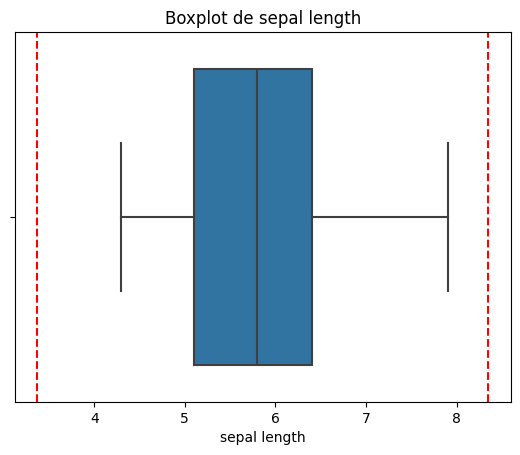

Número de outliers en sepal length: 0.
Lo que representa un 0.0 % del total de registros.

Outliers en sepal length (considerando 3 desvíos estándar):
Series([], Name: sepal length, dtype: float64)




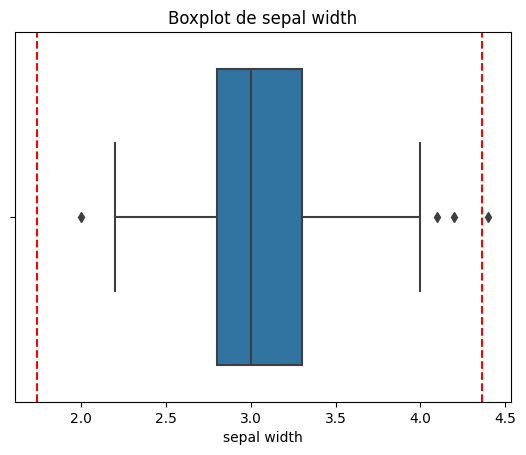

Número de outliers en sepal width: 1.
Lo que representa un 0.7 % del total de registros.

Outliers en sepal width (considerando 3 desvíos estándar):
14    4.4
Name: sepal width, dtype: float64




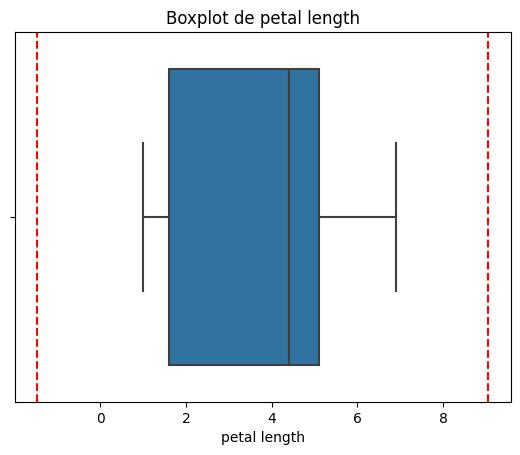

Número de outliers en petal length: 0.
Lo que representa un 0.0 % del total de registros.

Outliers en petal length (considerando 3 desvíos estándar):
Series([], Name: petal length, dtype: float64)




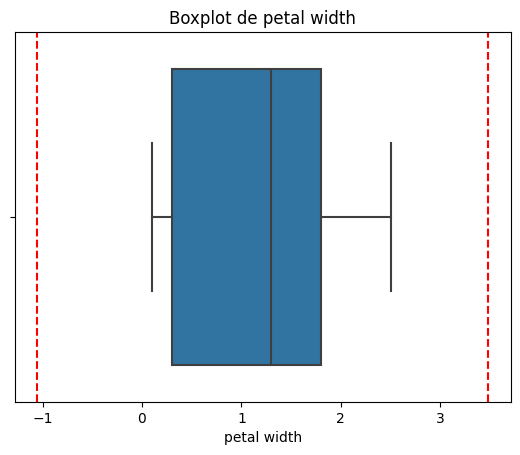

Número de outliers en petal width: 0.
Lo que representa un 0.0 % del total de registros.

Outliers en petal width (considerando 3 desvíos estándar):
Series([], Name: petal width, dtype: float64)




In [19]:
outliers(flores, 3)

In [22]:
def poda(df, multiplo):
    """
    Elimina mediante poda los registros donde al menos
    una de las características presente un outliers
    con el umbral definido.

    :param:
    :df: DataFrame con los atributos.
    :multiplo: Cantidad de desvíos estándar para definir
                umbral de 'outliers'.    
    """
    # Seleccionamos solo las columnas numéricas
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Calculamos el umbral de outliers para cada columna numérica
    thresholds = {}
    for column in numeric_columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        thresholds[column] = (mean - 3 * std_dev, mean + 3 * std_dev)

    # Filtramos el DataFrame para eliminar registros con outliers
    filtered_df = df.copy()
    for column, (lower, upper) in thresholds.items():
        filtered_df = filtered_df[(filtered_df[column] > lower) & (filtered_df[column] < upper)]

    return filtered_df

In [23]:
flores_filtered = poda(flores, 3)

In [24]:
flores_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  145 non-null    float64
 1   sepal width   145 non-null    float64
 2   petal length  145 non-null    float64
 3   petal width   145 non-null    float64
 4   class         145 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.8+ KB


En este caso se decidió estandarizar las características del dataframe dado que presentan rangos variables.

In [25]:
def escalado(df, ini_col, fin_col):
    """
    Escala las columnas, dentro del rango
    indicado, del dataframe de entrada.

    :param:
    :df: DataFrame con los atributos.
    :col_ini: Columna a partir de la cual eliminar.
    :col_fin: Columna hasta la cual eliminar.

    """
    # Normalizar columnas desde fin_col a fin_col
    cols_to_normalize = df.columns[ini_col:fin_col]

    df_normalized = df.copy()

    for col in cols_to_normalize:
        mean = df[col].mean()
        std = df[col].std()
        df_normalized[col] = (df[col] - mean) / std

    return df_normalized

In [27]:
flores_filtered_normalizaded = escalado(flores_filtered, 0, 3)

In [28]:
# Guardado del dataframe procesado
def guardar(df, path):
  """
  Guarda el data frame con los datos procesados
  en un archivo con terminación xlsx.

  :param:
  :df: DataFrame con los atributos.
  """
  try:
    df.to_csv(path, index=False)
  
  except:
    print('No se han podido persistir los datos.')

In [30]:
ruta_datos = os.path.join(ruta, "iris_procesados.csv")

guardar(flores_filtered_normalizaded, ruta_datos)

El método de poda se aplicó para todos los registros donde al menos se encontrara una característica donde se ubicara un *outlier* según el umbral propuesto de 3 desvíos estándar. Con estos resultados, se observó que el dataframe disminuyó su cantidad de registros en un 0.7% (de 146 a 145), lo cual no parece significativo a priori.

Fisher,R. A.. (1988). Iris. UCI Machine Learning Repository. https://doi.org/10.24432/C56C76.